# Data Cleaning and Preprocessing

## Import the Packages

In [1]:
# Data manipulation
import numpy as np
import pandas as pd
import datetime as dt

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

# Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
print('NumPy', np.__version__)
print('Pandas', pd.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn', sns.__version__)

NumPy 1.23.5
Pandas 2.0.1
Matplotlib 3.7.1
Seaborn 0.12.2


---
## Load the Data

In [4]:
link = 'https://github.com/sabirinID/Accenture-Strategy-Consulting-Virtual-Internship/raw/main/Files/5-Analyse%20Data%20from%20Project%20Launch/Task%205%20-%20Forage%20Accenture%20BNPL%20Dataset.xlsx'

df = pd.read_excel(link, header=0)

In [5]:
df.head(3)

,order_ref,user_id,user_age,transaction_amount,payment_method
0,1132281533,I0rmuuMuhEvJNM57,34,184.34,card
1,3969891453,qS2JZuEAEDsOP2Gx,50,342.49,bnpl
2,4151458626,RpV4Uu1dEszTCOEM,47,146.51,bnpl


In [6]:
df.tail(3)

,order_ref,user_id,user_age,transaction_amount,payment_method
296,4547464795,ccsFZwawm475aTiw,24,210.43,paypal
297,6752905764,9V5cb1KKRXigAt2E,25,137.26,paypal
298,3989227284,kDK4Vp6KTf1LUV5d,49,185.29,paypal


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_ref           299 non-null    int64  
 1   user_id             299 non-null    object 
 2   user_age            299 non-null    int64  
 3   transaction_amount  299 non-null    float64
 4   payment_method      299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


---
## Clean and Preprocess the Data

### Check the data for missing values, outliers, or errors

In [8]:
df.isna().sum().sum()

0

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe(include='all')

,order_ref,user_id,user_age,transaction_amount,payment_method
count,2.990000e+02,299,299.000000,299.000000,299
unique,NaN,299,NaN,NaN,3
top,NaN,I0rmuuMuhEvJNM57,NaN,NaN,bnpl
freq,NaN,1,NaN,NaN,119
mean,5.640905e+09,NaN,32.334448,214.076990,NaN
std,2.645584e+09,NaN,10.075646,76.846945,NaN
min,1.012455e+09,NaN,18.000000,83.210000,NaN
25%,3.395445e+09,NaN,23.000000,146.510000,NaN
50%,5.775407e+09,NaN,33.000000,218.110000,NaN
75%,7.951907e+09,NaN,41.000000,275.840000,NaN


---
## Analyze the Data

### Part 1: Creating Pivot Tables

In [11]:
# Divide the age into groups with an interval of 5, starting from 18 and ending at 52
bins = range(18, 54, 5)
labels = ['18-22', '23-27', '28-32', '33-37', '38-42', '43-47', '48-52']

# Create age groups
df['age_group'] = pd.cut(df['user_age'],
                         bins=bins,
                         labels=labels,
                         include_lowest=True)

df.head(3)

,order_ref,user_id,user_age,transaction_amount,payment_method,age_group
0,1132281533,I0rmuuMuhEvJNM57,34,184.34,card,33-37
1,3969891453,qS2JZuEAEDsOP2Gx,50,342.49,bnpl,48-52
2,4151458626,RpV4Uu1dEszTCOEM,47,146.51,bnpl,43-47


We will calculate the total transaction amount for each `age_group` and `payment_method`.

In [12]:
# Create pivot table
pivot_total_transaction = pd.pivot_table(
    df,
    values='transaction_amount',
    index='age_group',
    columns='payment_method',
    aggfunc=np.sum
    )

pivot_total_transaction

payment_method,bnpl,card,paypal
age_group,,,
18-22,12197.83,5181.06,817.56
23-27,6863.20,2683.99,581.91
28-32,434.27,3214.07,1941.47
33-37,2783.46,4831.88,3342.04
38-42,1003.37,2181.48,4730.42
43-47,869.83,2539.43,4361.05
48-52,958.28,1168.71,1323.71


We will count the number of transactions for each `payment_method` in each `age_group`.

In [13]:
pivot_payment_method = pd.pivot_table(
    df,
    values='order_ref',
    index='age_group',
    columns='payment_method',
    aggfunc='count'
    )

pivot_payment_method

payment_method,bnpl,card,paypal
age_group,,,
18-22,56,24,5
23-27,29,11,3
28-32,3,13,10
33-37,15,21,17
38-42,6,10,21
43-47,6,11,22
48-52,4,6,6


We will calculate the percentage of BNPL transactions for each age group.

In [14]:
pivot_payment_method['bnpl_percentage'] = round((pivot_payment_method['bnpl'] / pivot_payment_method.sum(axis=1)) * 100, 2)

pivot_payment_method

payment_method,bnpl,card,paypal,bnpl_percentage
age_group,,,,
18-22,56,24,5,65.88
23-27,29,11,3,67.44
28-32,3,13,10,11.54
33-37,15,21,17,28.30
38-42,6,10,21,16.22
43-47,6,11,22,15.38
48-52,4,6,6,25.00


---
## Visualize the Results

### Part 2: Creating Bar Chart

Show the share of BNPL transactions as a percentage of total transactions for each age group.

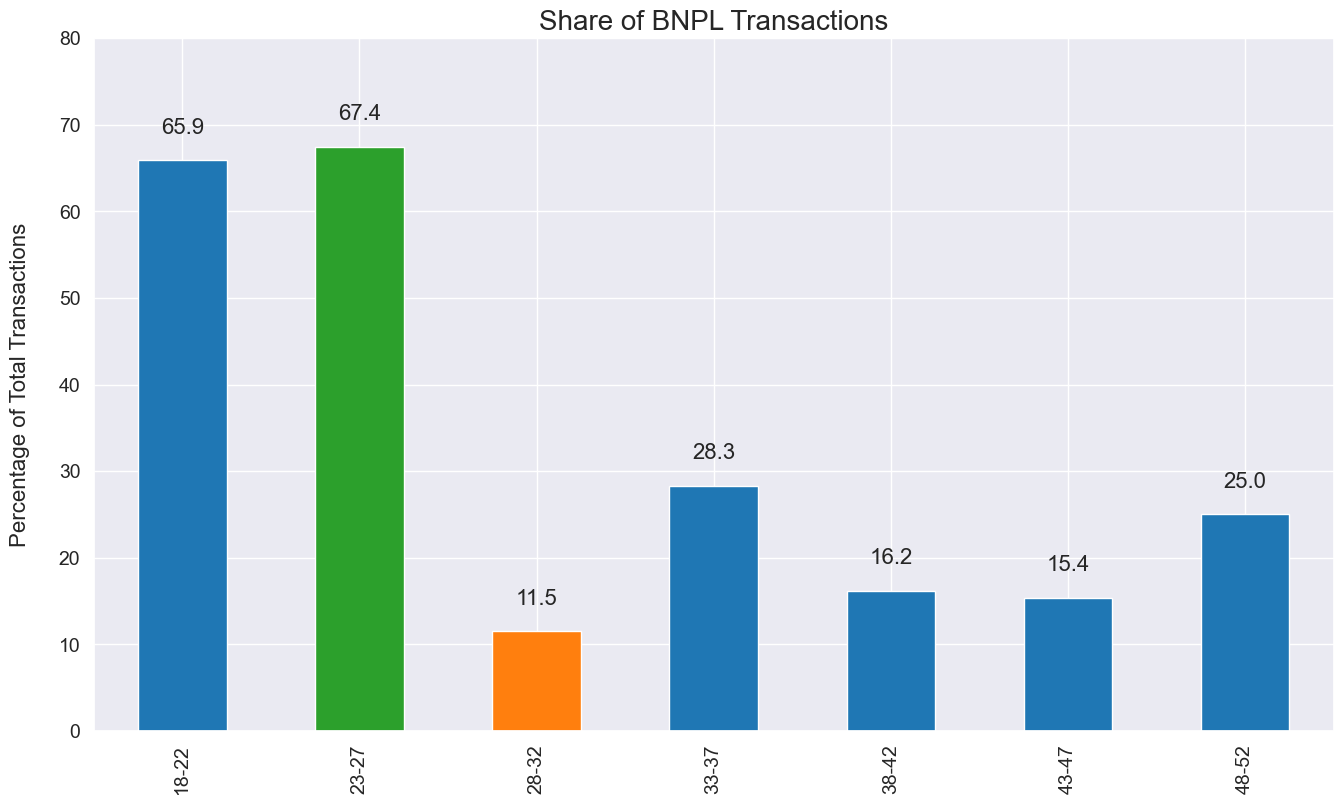

In [15]:
# Create bar chart
fig, ax = plt.subplots(figsize=(16, 9))

# Get the data for colors
bnpl_percentage = pivot_payment_method['bnpl_percentage']
colors = ['tab:green' if val == bnpl_percentage.max() else
          'tab:orange' if val == bnpl_percentage.min() else
          'tab:blue' for val in bnpl_percentage]

bars = pivot_payment_method['bnpl_percentage'].plot(kind='bar', ax=ax, color=colors)
ax.set_title('Share of BNPL Transactions', fontsize=20)
ax.set_xlabel('')
ax.set_ylabel('Percentage of Total Transactions\n', fontsize=16)
ax.tick_params(axis='both', labelsize=14)

# Add annotations for each bar
for bar in bars.patches:
    ax.annotate(format(bar.get_height(), '.1f'),
                (bar.get_x() + bar.get_width() / 2, bar.get_height() + 2.5),
                ha='center', va='center',
                size=16, xytext=(0, 8),
                textcoords='offset points')

ax.set_ylim(0, 80)

plt.show()

---
## Interpret the Results